# Why do we need Activation Fn in NN ?

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(0)
np.random.seed(0)

x_train = torch.linspace(-10, 10, 1000).unsqueeze(1) # gen data between -10 and 10
y_train = x_train ** 3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Used device =", device.type)

x_train = x_train.to(device)
y_train = y_train.to(device)

Used device = cpu


In [31]:
class NetWithoutActivation(nn.Module):
    def __init__(self):
        super(NetWithoutActivation, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.Linear(64, 64),
            nn.Linear(64, 64),
            nn.Linear(64, 64),
            nn.Linear(64, 64),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.model(x)

In [ ]:
class NetWithReLUActivation(nn.Module):
    def __init__(self):
        super(NetWithReLUActivation, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.model(x)

In [42]:
def train_model(model, x_train, y_train, epochs=1000, learning_rate=0.001):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return model

In [43]:
def plot_result(model, title):
    model.eval()
    with torch.no_grad():
        x_plot = torch.linspace(-10, 10, 1000).unsqueeze(1).to(device)
        y_true = x_plot ** 3
        y_pred = model(x_plot)
    
    x_plot = x_plot.cpu().numpy()
    y_true = y_true.cpu().numpy()
    y_pred = y_pred.cpu().numpy()

    plt.plot(x_plot, y_true, label='True $x^3$', color='blue')
    plt.plot(x_plot, y_pred, label='Network Predicted', color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

Training without activation function
Epoch [100/1000], Loss: 23003.7500
Epoch [200/1000], Loss: 22994.4434
Epoch [300/1000], Loss: 22994.4453
Epoch [400/1000], Loss: 22994.4434
Epoch [500/1000], Loss: 22994.4434
Epoch [600/1000], Loss: 22994.4434
Epoch [700/1000], Loss: 22994.4434
Epoch [800/1000], Loss: 22994.4434
Epoch [900/1000], Loss: 22994.4434
Epoch [1000/1000], Loss: 22994.4434


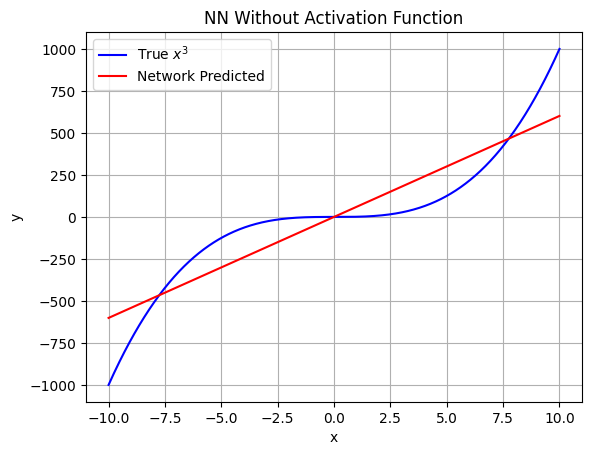

Training with activation function (ReLU)
Epoch [100/1000], Loss: 131407.1562
Epoch [200/1000], Loss: 123708.3438
Epoch [300/1000], Loss: 116966.3516
Epoch [400/1000], Loss: 110796.7188
Epoch [500/1000], Loss: 105072.6641
Epoch [600/1000], Loss: 99726.1953
Epoch [700/1000], Loss: 94708.5156
Epoch [800/1000], Loss: 89987.9688
Epoch [900/1000], Loss: 85536.3516
Epoch [1000/1000], Loss: 81330.8984


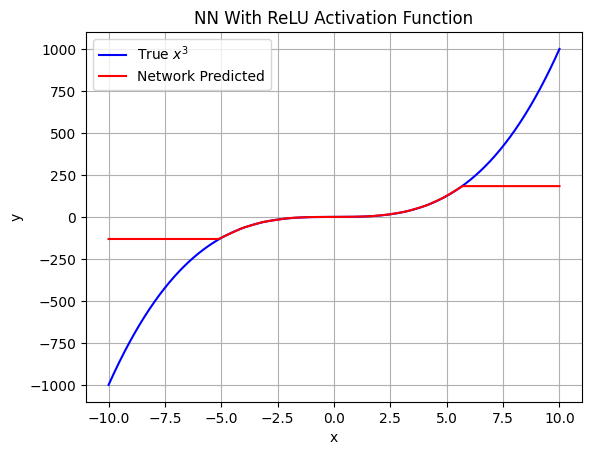

In [44]:
print("Training without activation function")
model_no_activation = NetWithoutActivation()
model_no_activation = train_model(model_no_activation, x_train, y_train, epochs=1000, learning_rate=0.001)
plot_result(model_no_activation, "NN Without Activation Function")

print("Training with activation function (ReLU)")
model_with_activation = NetWithReLUActivation()
model_with_activation = train_model(model_with_activation, x_train, y_train, epochs=1000, learning_rate=0.001)
plot_result(model_with_activation, "NN With ReLU Activation Function")  